Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2024
<br>

<h1><center>Tarea 1: Predicción de lluvias</center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 12 de abril



## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.1 MB/s eta 0:00:00


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from matplotlib import offsetbox
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

##Introducción


Este conjunto de datos contiene aproximadamente 10 años de observaciones meteorológicas diarias de distintos lugares de Australia.

A continuación, se describen las variables consideradas:

* Date:	Fecha (cualitativa)
* Location: Ubicación	(cualitativa)
* MinTemp: Temperatura mínima (Celsius)
* MaxTemp: Temperatura máxima (Celsius)
* Rainfall:  Cantidad de lluvia (mm)
* Evaporation: Cantidad de agua evaporada (mm)
* Sunshine: Número de horas de sol (horas)
* WindGustDir: Dirección del viento (cualitativa)
* WindGustSpeed: Velocidad de la ráfaga de viento más fuerte (km/h)
* WindDir9am: Dirección del viento 9 am (cualitativa)
* WindDir3pm: Dirección del viento 3 pm (cualitativa)
* WindSpeed9am: Velocidad del viento 9 am (km/h)
* WindSpeed3pm: Velocidad del viento 3 pm (km/h)
* Humidity9am: Nivel de humedad 9 am (%)
* Humidity3pm: Nivel de humedad 3 pm (%)
* Pressure9am: Presión atmosférica 9 am (hPa)
* Pressure3pm: Presión atmosférica 3 pm (hPa)
* Cloud9am: Fracción de cielo cubierta por nubes 9 am (0-8)
* Cloud3pm: Fracción de cielo cubierta por nubes 3 pm (0-8)
* Temp9am: Temperatura 9 am 	(Celsius)
* Temp3pm: Temperatura 3 pm 	(Celsius)
* RainToday: ¿Llovió hoy? (Sí/No) (cualitativa)
* **RainTomorrow: ¿Lloverá mañana? (Sí/No) (cualitativa)**

En este caso, la variable RainTomorrow es la variable que se busca predecir.




## Parte 1: Carga y Preprocesamiento de Datos (15 puntos)

**En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.**

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.

**BONUS (4 puntos)**

Investigue e implemente una técnica de imputación de datos. Reemplace los valores nulos por los valores calculados. Mencione las limitaciones de la propuesta.

RESPUESTA:

#### Carga del dataset y eliminación de valores nulos

In [3]:
df = pd.read_csv('dataset.csv')
df.shape

(145460, 23)

In [4]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df_filtered = df.dropna()
print(df_filtered.shape)

(56420, 23)


#### Imputación usando SimpleImputer
SimpleImputer rellena los valores faltantes (NaN) siguiendo la estretegia del valor 'strategy', en este caso utilicé 'most_frequent'.

In [6]:
imputed_df = df.copy()
imputer = SimpleImputer(strategy='most_frequent')
imputed_df = pd.DataFrame(imputer.fit_transform(imputed_df), columns=imputed_df.columns)
print(imputed_df.shape)

(145460, 23)


In [7]:
imputed_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### 1.2 Análisis descriptivo (6 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las siguientes variables:

* RainTomorrow
* Cantidad total de lluvia caída (Rainfall) por ubicación (Location). ¿Qué lugar presenta la mayor cantidad de agua caída?
* Muestre la relación entre la temperatura a las 9 am (Temp9am) y la temperatura a las 3 pm (Temp3pm).
* Muestre la relación existente entre el número de horas de sol (Sunshine) y la variable RainTomorrow

Comente todos los resultados obtenidos.

RESPUESTA:

  Se puede ver que hay muchos más valores No para RainTomorrow que Yes, comportamiento completamente normal ya que no siempre llueve.

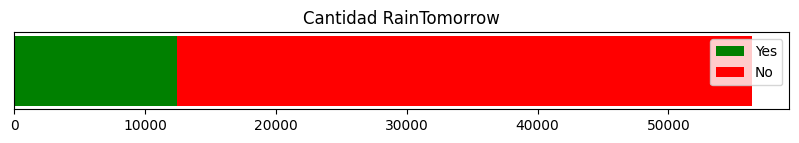

In [8]:
df_plot = df_filtered['RainTomorrow'].value_counts()
plt.figure(figsize=(10,1))
plt.barh(y=['RainTomorrow'], width=df_plot['Yes'], color='g', label='Yes')
plt.barh(y=['RainTomorrow'], width=df_plot['No'], left=df_plot['Yes'], color='r', label='No')

plt.title('Cantidad RainTomorrow')
plt.legend()
plt.yticks([])
plt.grid(False)

plt.show()


Las ubicaciones con mayor cantidad de lluvia caída son:

1.   Darwin
2.   Cairns
3.   Brisbane



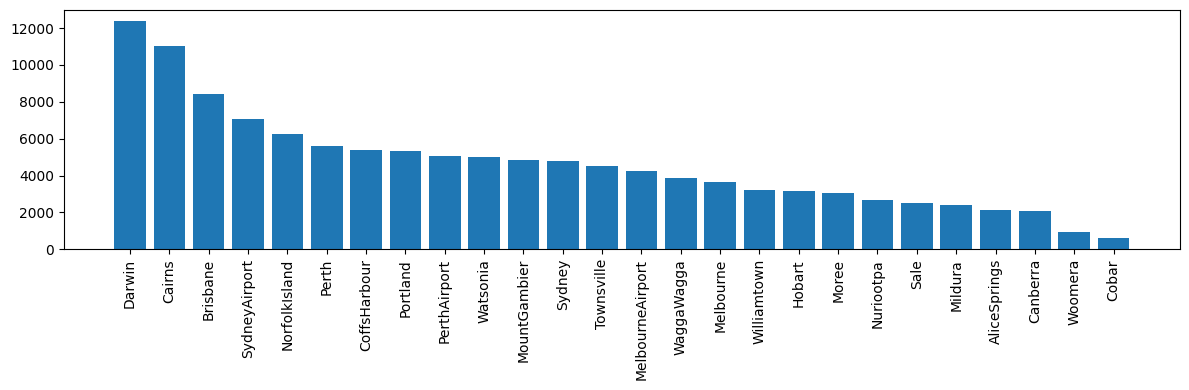

In [9]:
df_plot = df_filtered.groupby('Location')['Rainfall'].sum()
df_plot_sorted = df_plot.sort_values(ascending=False)

positions = np.arange(len(df_plot_sorted))

plt.figure(figsize=(12,4))
plt.bar(positions, df_plot_sorted.values)
plt.xticks(positions, df_plot_sorted.index, rotation=90)
plt.tight_layout()
plt.show()

Existe una correlación de 0.87 entre la temperatura a las 9am y la temperatura a las 3pm.

         Temp3pm  Temp9am
Temp3pm  1.00000  0.87062
Temp9am  0.87062  1.00000


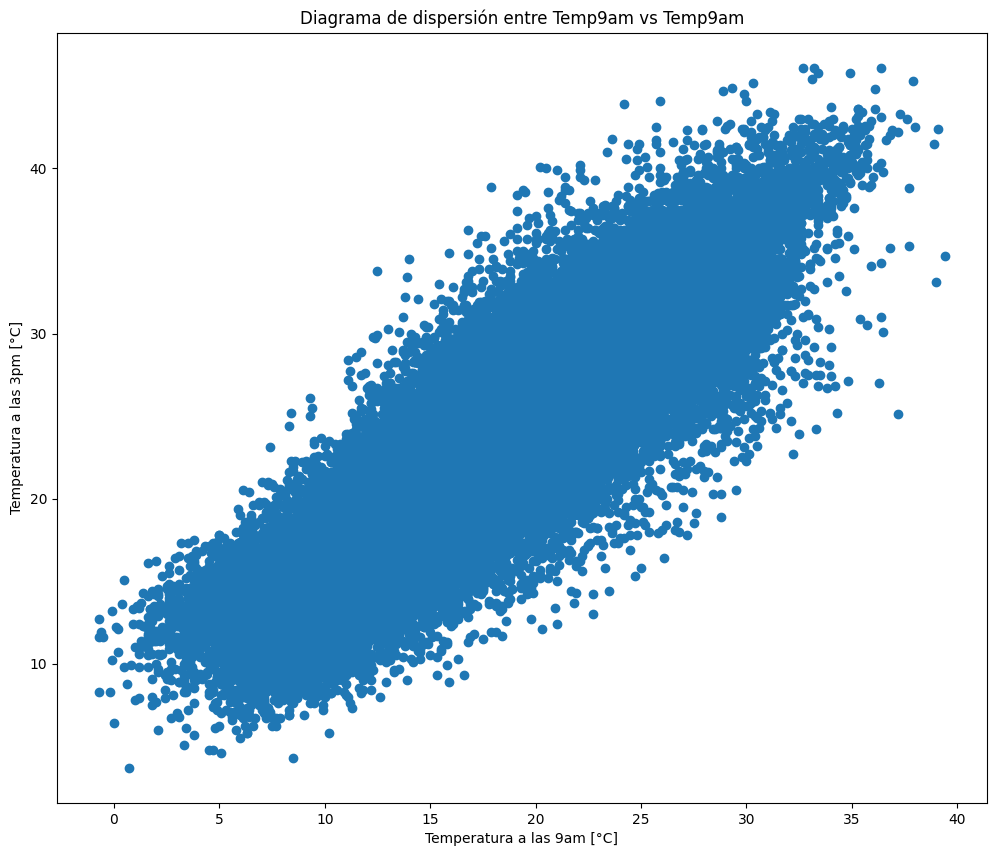

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(x=df_filtered['Temp9am'], y=df_filtered['Temp3pm'])
plt.xlabel('Temperatura a las 9am [°C]')
plt.ylabel('Temperatura a las 3pm [°C]')
plt.title('Diagrama de dispersión entre Temp9am vs Temp9am')
print(df_filtered[['Temp3pm','Temp9am']].corr())
plt.show()

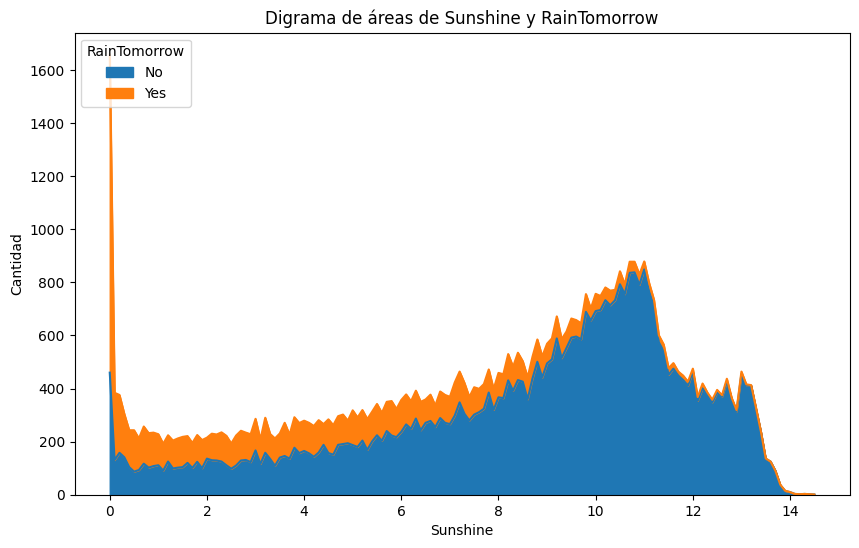

In [11]:
df_plot = df_filtered.groupby(['Sunshine', 'RainTomorrow'])['RainTomorrow'].count().unstack()

ax = df_plot.plot(kind='area', figsize=(10, 6))

plt.title('Digrama de áreas de Sunshine y RainTomorrow')
plt.xlabel('Sunshine')
plt.ylabel('Cantidad')
plt.legend(title='RainTomorrow', loc='upper left')

plt.show()

### 1.3 Normalizar datos (4 puntos)

Realice un proceso de normalización del conjunto de datos. Para las variables cuantitativas utilice MinMaxScaler y para las variables cualitativas trabaje con el enfoque OneHotEncoder.

Explique por qué es útil realizar esta acción.

Observación: No considere las variables Date y RainTomorrow.

RESPUESTA:

Esto se realiza porque los modelos de aprendizaje automático trabajan mucho mejor con valores de 0 ~ 1, es por esto que se escalan las variables numéricas para que el mínimo calce con 0 y el máximo con 1.

Por otro lado OneHotEncoder crea una nueva columna por cada valor distinto en la columna original y asigna un valor booleano (0 o 1) a la fila con respecto a qué valor tenía en la columna original, esto con el mismo motivo anterior.

In [12]:
df_filtered.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
# MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
numeric_columns = df_filtered.select_dtypes(include=['int', 'float']).columns
df_filtered.loc[:, numeric_columns] = min_max_scaler.fit_transform(df_filtered[numeric_columns])

# OneHotEncoder
categorical_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
one_hot_encoder = preprocessing.OneHotEncoder()
encoded_columns = one_hot_encoder.fit_transform(df_filtered[categorical_columns])

encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns), index=df_filtered.index)
df_filtered_copy = df_filtered.copy()
df_filtered_copy.drop(columns=categorical_columns, inplace=True)
X = pd.concat([df_filtered_copy, encoded_df], axis=1)
X.drop(['Date','RainTomorrow'], axis=1, inplace=True)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,0.645669,0.706818,0.0,0.147783,0.848276,0.339130,0.061538,0.243243,0.20,0.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6050,0.658793,0.563636,0.0,0.182266,0.896552,0.243478,0.261538,0.229730,0.30,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6052,0.685039,0.761364,0.0,0.133005,0.731034,0.321739,0.430769,0.175676,0.42,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6053,0.750656,0.779545,0.0,0.140394,0.841379,0.191304,0.061538,0.054054,0.37,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6054,0.811024,0.838636,0.0,0.137931,0.579310,0.226087,0.230769,0.148649,0.19,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan las mayores relaciones lineales.

Observación: Para este análisis solo trabaje con las variables cuantitativas normalizadas en el paso anterior.

RESPUESTA:

<Axes: >

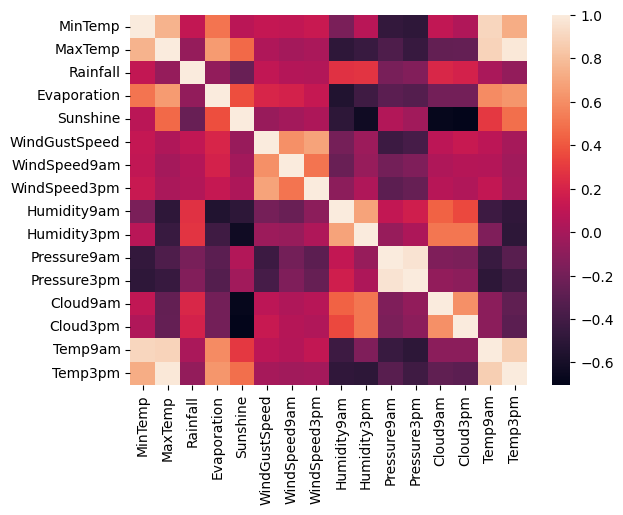

In [14]:
sns.heatmap(X[numeric_columns].corr())

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Comente.

RESPUESTA:

In [15]:
pca = PCA(n_components=92)
pca.fit(X)

PCA(n_components=92)

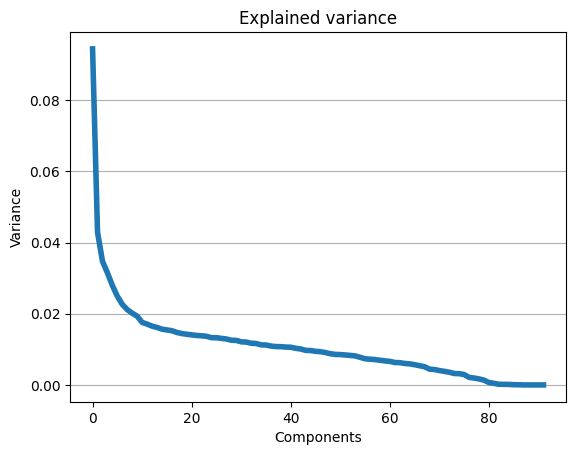

In [16]:
def plot_var_curve(X): # Función ocupada en 2 - DISTANCIAS PROXIMIDADES Y PCA.ipynb
    plt.plot(X, lw=4)
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')

plot_var_curve(pca.explained_variance_ratio_)

### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

In [17]:
def min_var(v,exp_var): # Función ocupada en 2 - DISTANCIAS PROXIMIDADES Y PCA.ipynb
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

ret90 = min_var(0.9,pca.explained_variance_ratio_)
pca90 = PCA(n_components=ret90)
X90 = pca90.fit_transform(X)
print(ret90)

58


### 2.3 Reducir dimensionalidad a n=6 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 6 . Determine la proporción de varianza explicada.

RESPUESTA:

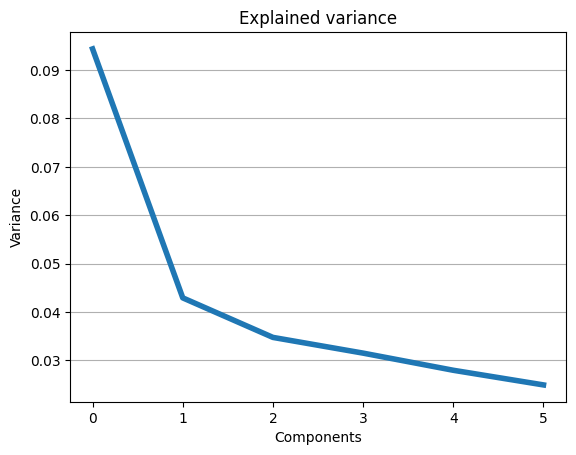

In [18]:
pca = PCA(n_components=6)
pca.fit(X)
plot_var_curve(pca.explained_variance_ratio_)

## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

In [19]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(X90)
scores = lof.negative_outlier_factor_
print(scores)

[-1.21699278 -1.15681801 -1.81371869 ... -2.05240526 -0.99879539
 -1.21917179]


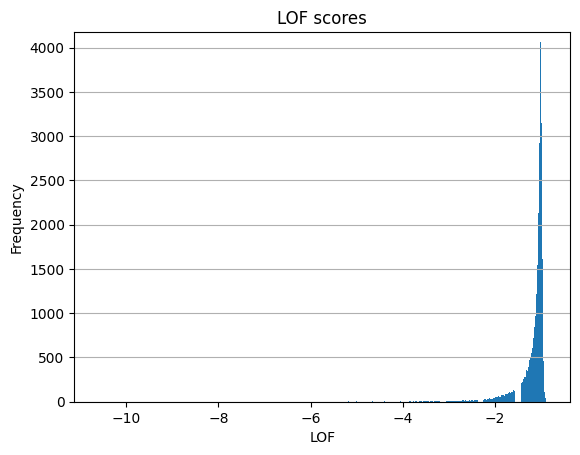

In [20]:
def plot_hist(X, title):  # Función ocupada en 4 - VECINOS CERCANOS.ipynb
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

plot_hist(scores, 'LOF scores')

### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -2, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

In [21]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

outliers_proportion = lof_threshold(-2,scores)
print(f'Proporción de outliers: {outliers_proportion}')

lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=outliers_proportion)
labels = lof.fit_predict(X90)
indices = list(np.where(labels==1)[0])
X90_inline = X90[indices,:]

Proporción de outliers: 0.03819567529244949


In [22]:
X90_inline.shape

(54265, 58)

## Parte 4: Visualización T-SNE y UMAP (12 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 4.1 T-SNE (5 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo.


RESPUESTA:

T-SNE es una técnica de reducción de dimensionalidad para visualizaciones la cual preserva la estructura local y junta los datos en clústers. La forma en que agrupa los datos es utilizando la esperanza y distribución de probabilidad entre los datos, utilizando la divergencia Jensen-Shanon para que sea más eficiente que KL.

In [24]:
tsne_embed = TSNE(n_components=2, perplexity = 25, n_iter=1000, n_iter_without_progress=10, n_jobs=10)
projection = tsne_embed.fit_transform(X90_inline)

<Axes: >

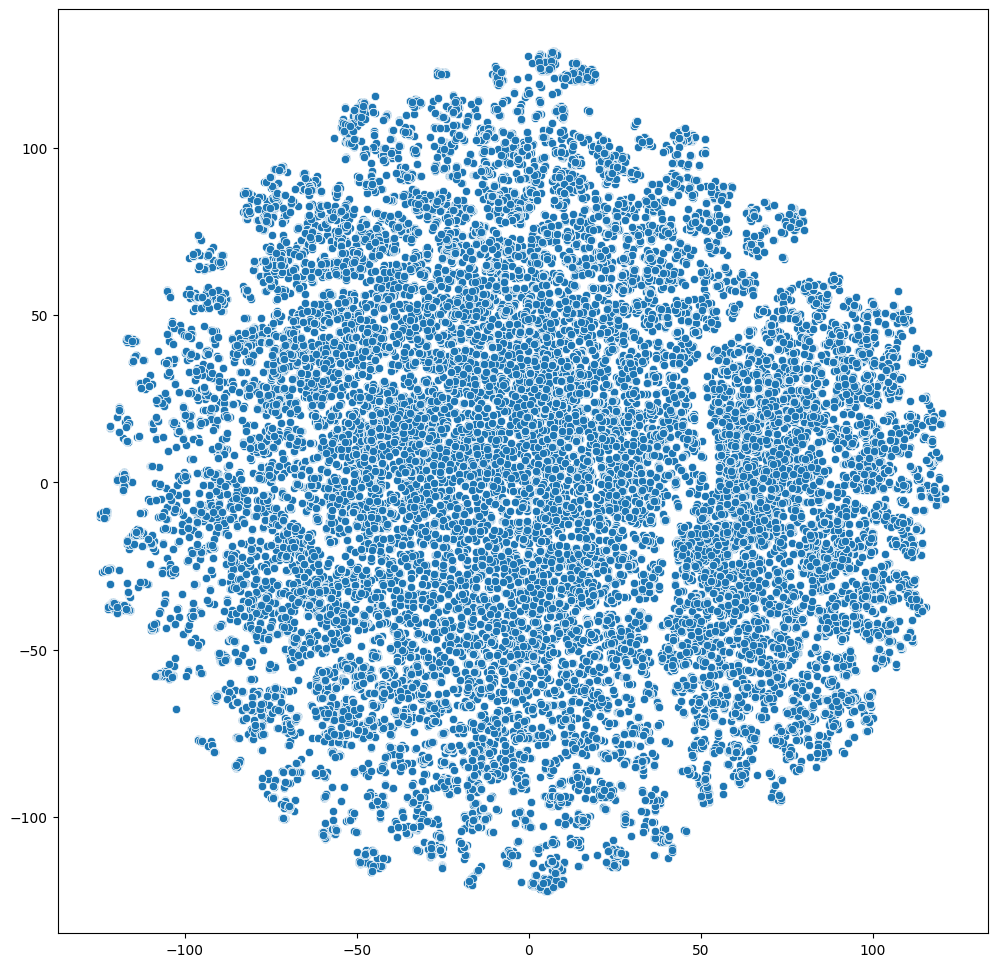

In [25]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=projection.T[0], y=projection.T[1])

### 4.2 UMAP (5 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo.

RESPUESTA:

UMAP al igual que T-SNE, es una técnica de reducción de dimensionalidad para visualizaciones. Esta crea un grafo a partir de los datos y luego aprende un embedding a partir de este para graficar los datos.

In [27]:
umap_2d = umap.UMAP(n_components = 2, min_dist = 0.6, n_neighbors= 40, n_jobs=1)
projection = umap_2d.fit_transform(X90_inline)

<Axes: >

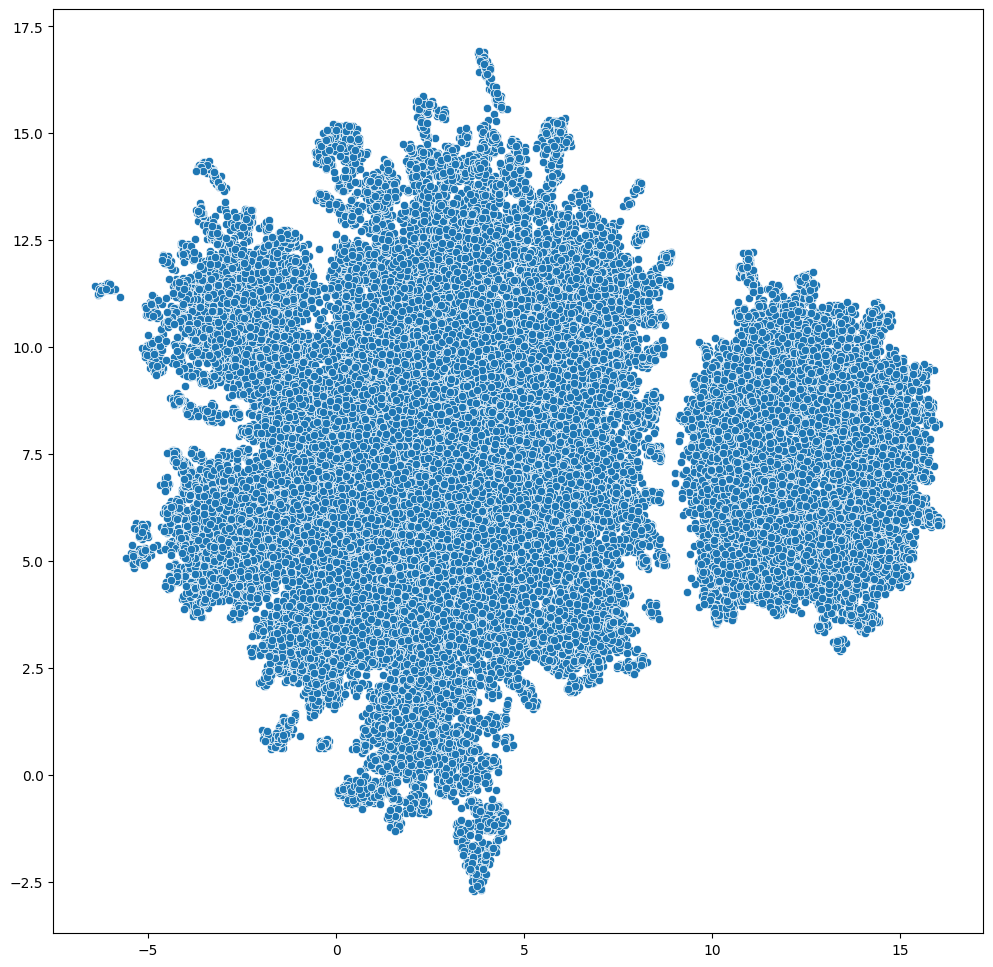

In [29]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=projection.T[0], y=projection.T[1])

###4.3 Comparar resultados (2 puntos)

Compare los resultados obtenidos por T-SNE y UMAP.

RESPUESTA:

Se notan claramente los clusters en UMAP, al contrario de T-SNE que se logra ver que existen dos clusters, uno grande a la izquierda y uno pequeño a la derecha, pero que en el grande podrían existir más clusters.

Además UMAP se demoró mucho menos en ejecutar ya que trabaja mejor con mayores cantidades de datos.

#Parte 5: Cluster (13 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

###5.1 Descripción K-means (4 puntos)

Describa el método k-means. Mencione sus principales fortalezas y limitaciones.

RESPUESTA:

KMEANS es un algoritmo de clustering el cual asgina K-centroides y los reasigna hasta encontrar el óptimo entre todos los posibles.

Fortalezas: siempre converge, es de los más utilizados por lo que se puede encontrar información en muchas partes.

Limitaciones: requiere que se especifiquen la cantidad de clústers, depende de los valores iniciales y funciona mal con outliers.

###5.2 Aplicación K-means (5 puntos)

* Correr K-Means para valores `k` en el rango `[2, 3, 4, 5, 6, 7]`
* Realizar un gráfico ELBOW
* Obtener el Silhoutte Score para distintos números de cluster y graficar  
* Determinar el número de clusters óptimo

RESPUESTA:

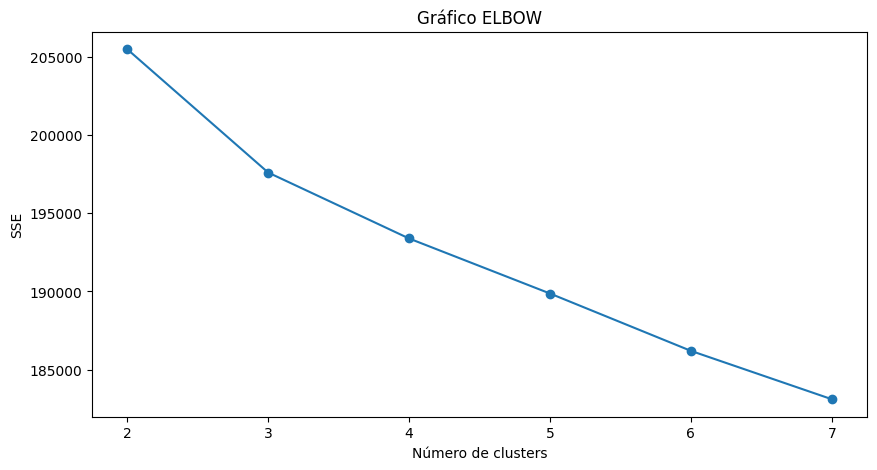

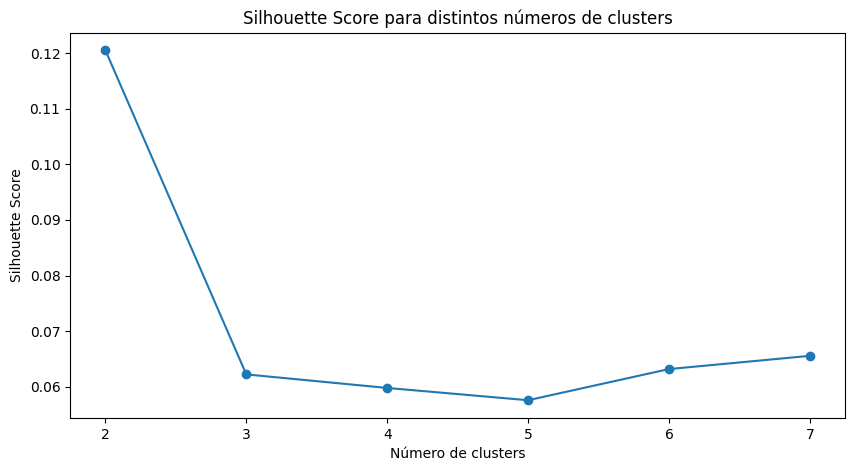

El número óptimo de clusters según Silhouette Score es: 2


In [48]:
sse = []
silhouette_scores = []

k_values = [2, 3, 4, 5, 6, 7]

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X90_inline)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X90_inline, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Gráfico ELBOW')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para distintos números de clusters')
plt.show()

optimal_k = k_values[np.argmax(silhouette_scores)]
print("El número óptimo de clusters según Silhouette Score es:", optimal_k)

###5.3: Graficar clusters (4 puntos)

Utilizando los resultados obtenidos en la parte 4, vuelva a graficar las representaciones de T-SNE y UMAP indicando el cluster al que corresponde cada punto. Para ello, utilice el número de clusters óptimo obtenido en la parte 5. Comente los resultados.

RESPUESTA:

In [49]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(X90_inline)

cluster_labels = kmeans.labels_

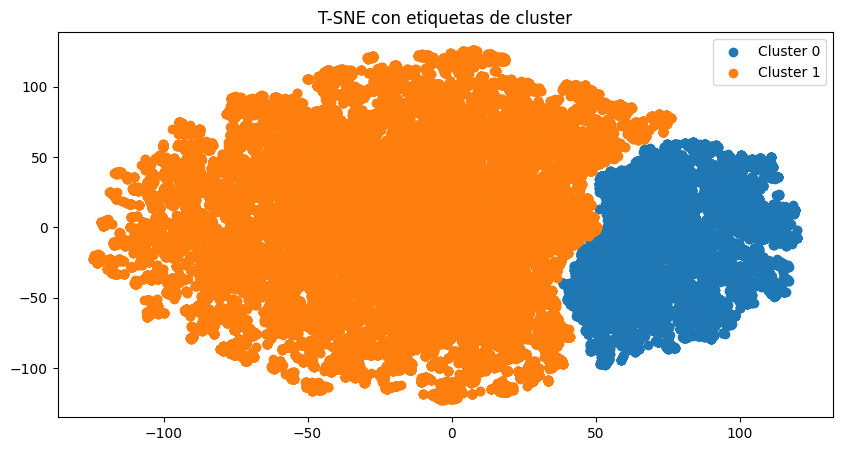

In [36]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X90_inline)

plt.figure(figsize=(10, 5))
for i in range(optimal_k):
    plt.scatter(X_tsne[cluster_labels == i, 0], X_tsne[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title('T-SNE con etiquetas de cluster')
plt.legend()
plt.show()

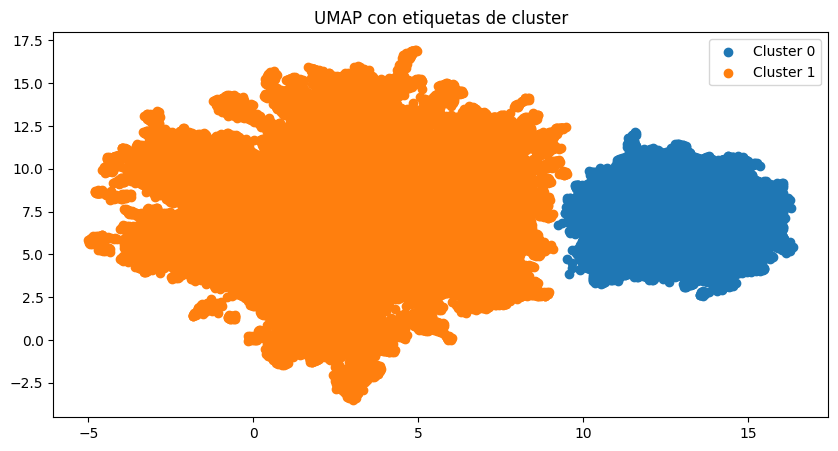

In [46]:
umap2d = umap.UMAP(n_components=2, min_dist = 0.6, n_neighbors= 40, n_jobs=1)
X_umap = umap2d.fit_transform(X90_inline)

plt.figure(figsize=(10, 5))
for i in range(optimal_k):
    plt.scatter(X_umap[cluster_labels == i, 0], X_umap[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title('UMAP con etiquetas de cluster')
plt.legend()
plt.show()

Esta vez no utilicé hiperparámetros para T-SNE y los mismos para UMAP y obtuve mejores resultados, además de tener los dos clusters seprarados por colores claramente, igual que en las visualizaciones previas.